# **ELECTRONIC NOSE FOR DETECTION OF DEFECTS IN COFFEE SOFTWARE** #


### The following figure illustrates the general scheme of the different stages in digital data processing.

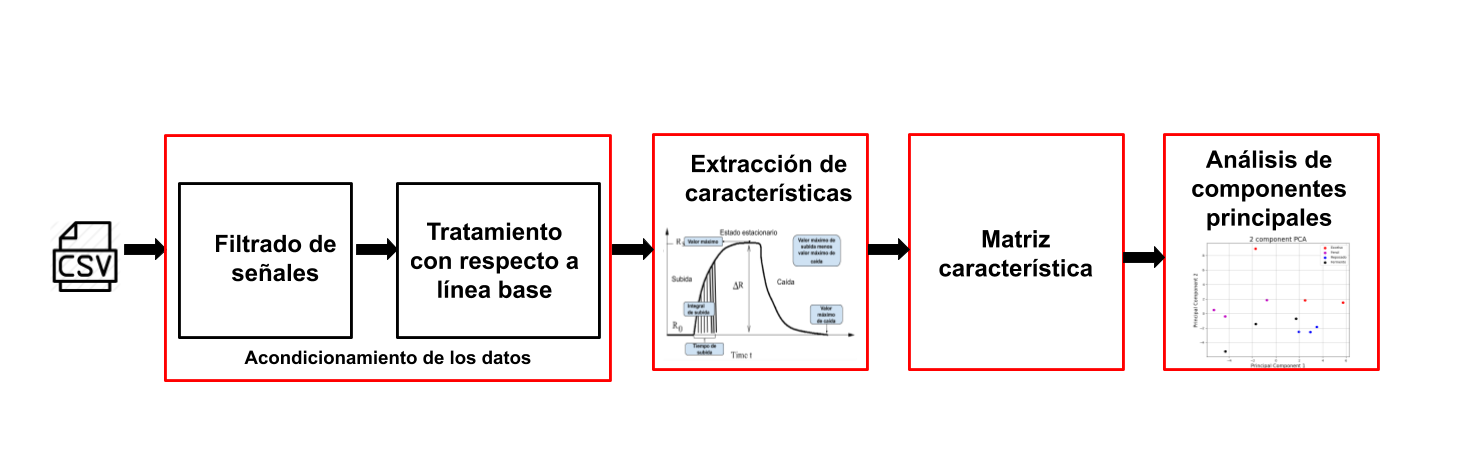

In [2]:
from IPython.display import Image
Image(filename='Procesamiento.png',width=700,height=700)

#### In the analysis carried out, it was considered that the response of the sensors should be conditioned for the digital processing of the data. According to the research of (Campos, et al., 2015) this process allows mitigating errors caused by electromagnetic noise, sample temperature and humidity. For this, a ***filtering*** and a method called ***treatment with respect to baseline***. 

#### * **Filter**
#### After performing a Fourier analysis of the sensor response, I know determined the use of a digital filter of order one because a temporal analysis of sensor responses and what is finally desired is soften this answer This filter is applied independently to each sensor.


#### * **Treatment with respect to baseline**

#### **Differential method**
#### It is the process in which the baseline value (reference) is subtracted from the sensor response,(Gutierrez-Osuna, Nagle, 1999). In this way, additive errors in voltage pulses are eliminated (Pearce et al., 2006).


#### This process is given by the following equation

$$
  R_{m,n}^B=R_{m, n}(k)-R_{m,n}
 $$ 

#### * **Feature Extraction**
#### The most common characteristics for data processing are the transient characteristics that contain the dynamics of the sensor and the sample. The transient characteristics correspond to the steady state value, the rise time, the rise integral, the maximum rise value and the maximum fall value of the sensor response.

#### Any mathematical method can be used to analyze these characteristics. of cluster, neural networks, vector support machine, among others.

In [10]:
import csv
import pandas as pd
import numpy as np
from scipy.signal import butter
from scipy import signal
from scipy.integrate import simps
from numpy import linalg as LA

In [11]:
def LeerDatosCsv(a):
    """Read archive csv
    Argument:
        a:Archive csv
    Return: Array the csv archive"""
    df =pd.read_csv(a)
    sensores =df.to_numpy()
    return sensores

In [12]:
def Filtrado(N, Wn,senal):
    B,A = butter(N,Wn,'low',analog=False)
    senalFiltrada = signal.lfilter(B,A,senal)       
    return senalFiltrada

In [13]:
def normalizarLista(lista):
    aux=lista-lista[0]
    """aux=(lista-lista[0])/lista[0]
    aux2=np.power(aux,2)
    sum_aux2 = np.sum(aux2,axis=0,keepdims=True)
    sqrt_sum_aux2=np.sqrt(sum_aux2)
    lista_normalizada=np.divide(aux,sqrt_sum_aux2)
    return lista_normalizada"""
    return aux

In [14]:
##### Rise Time ########  
def upperlim(dim,matrix):
    """ upper lim of one sensor
    Argument: 
    dim: dimension of array sensors
    matrix: the matrix with 8 sensors
    Return:
    lowerlim: The one sensor (max*0.9)"""
    sensor1=(matrix[dim,:].max()*0.6)
    upperlim = 0
    for i in matrix[dim,:]:
        
        upperlim+=1
        if i >=sensor1:
            break
    return upperlim   


def riseTime(dim,matrix):
    """One list from the lower limit to the upper
    limit.
    Argument:
        dim: dimesion of each sensor (row)
        matrix:arrays of 8xN (8 rowns, N number of samples)
    Return:
        One list""" 
    row = matrix[dim]
    upperLimit = upperlim(dim,matrix)
    grossRange = row[:upperLimit]
    prueba=grossRange-min(grossRange)
    umbral = max(grossRange)*0.1
    ranks = []
    for i in reversed(prueba):
        ranks.append(i)
        if i <= umbral :
            break
    return (len(ranks)/874)
    #return len(ranks)

def riseTimeAll(matrix):
    """Eight list, one for each sensor.
    Argument:
        matrix: arrays of 8XN(8 rowns, N number of samples)
    Return:
        Eight list"""
    ranksensors=[]
    for i in range(8):
        ranksensors.append(riseTime(i,matrix))
    return ranksensors

In [15]:
### Integrate
def upperlimInte(dim,matrix):
    """ upper lim of one sensor
    Argument: 
    dim: dimension of array sensors
    matrix: the matrix with 8 sensorsz
    Return:
    lowerlim: The one sensor (max)"""
    sensor1=(matrix[dim,:].max())
    upperlim = 0
    for i in matrix[dim,:]:
        
        upperlim+=1
        if i >=sensor1:
            break
    return upperlim    

def rank(dim,matrix):
    """One list from the lower limit to the upper
    limit.
    Argument:
        dim: dimesion of each sensor (row)
        matrix:arrays of 8xN (8 rowns, N number of samples)
    Return:
        One list""" 
    row = matrix[dim]
    upperLimit = upperlimInte(dim,matrix)
    grossRange = row[:upperLimit]
    prueba=grossRange-min(grossRange)
    umbral = max(grossRange)*0.1
    ranks = []
    for i in reversed(prueba):
        ranks.append(i)
        if i <= umbral :
            break
    return (sorted(ranks))


def rankSensors(matrix):
    """Eight list, one for each sensor.
    Argument:
        matrix: arrays of 8XN(8 rowns, N number of samples)
    Return:
        Eight list"""
    ranksensors=[]
    for i in range(8):
        ranksensors.append(rank(i,matrix))
    return ranksensors

def integrate(y):
    """rank sensor
    Argument:
        y: the list of the values of the sample
    Return:
        I: Integrate of one sensor"""
    x=len(y)+1
    x=list(range(1,x))
    I=simps(y,x)
    return I

def integrateAll(ranksensor):
    """Integrate rise of each sensor
    Argument:
        ranksensors: rank sensor neto
    Return:
        One lists of 8 elements with the integrate of each sensor"""
    integrateall = []
    for i in range(8):
        integrateall.append(integrate(ranksensor[i]))
        #integrateall.append((ranksensor[i]))
    return integrateall

def listIntegrate(datosF):
    """Reunion de todas las funciones"""
    Rangos = rankSensors(datosF)
    IntegraldeTodos = integrateAll(Rangos)
    return IntegraldeTodos  

In [16]:
### Value Maximum
def valueMax(dim,matrix):
    """ upper lim of one sensor
    Argument: 
    dim: dimension of array sensors
    matrix: the matrix with 8 sensors
    Return:
    lowerlim: The one sensor (max*0.9)"""
    sensor1=(matrix[dim,:].max()*0.6)
    
    return sensor1

def valueMaxAll(matrix):
    """8 values with rise time
    Argum:
    matrix: matrix of sensors
    
    Return:list with 8 valores"""
    sensors=[]
    for i in range(8):
        sensors.append(valueMax(i,matrix))
    return sensors

In [17]:
### Stationary Value #####
    
def stationaryValue(dim,matrix):
    """ upper lim of one sensor
    Argument: 
    dim: dimension of array sensors
    matrix: the matrix with 8 sensors
    Return:
    lowerlim: The one sensor (max*0.9)"""
    sensor1 = (matrix[dim,:].max())
    return sensor1 

def stationaryValueAll(matrix):
    """
    Argumen: Matrix of the eigth sensors.
    Return: List with the eight maximum values of values in 
    stationary states.
    """
    lista=[]
    for i in range(8):
        lista.append(stationaryValue(i,matrix))
    return  lista  

In [18]:
#### Fall Time #####
    
def maxi(matrix):
    """Choose the maximum in each rowm
    Argument: matrix of all sensor, 1 row the sensor response
    Return: list maximum of the each row"""
    m,n =np.shape(matrix)
    maximum=[]
    for i in range(m):
        maximum.append(np.max(matrix[i,:]))
    return(maximum)

def fallTime(matrix,dim):
    """Get the fall value
    Argument: matrix of all sensors, 1 row the sensor response
    Return: min of the row"""
    maximum=maxi(matrix)
    c=0
    for i in (matrix[dim,:]):
        c+=1
        if i>=maximum[dim]:
            break
    fallTime=matrix[dim,:]
    return(min(fallTime[c:]))
    #return fallTime[c:]
    
def fallTimeAll(matrix):
    """Get the fall value all sensors
    Argument: matrix of the all sensors
    Return: lists of min all sensors"""
    m,n=np.shape(matrix)
    fallTimeAll=[]
    for i in range(m):
        fallTimeAll.append(fallTime(matrix,i))
    return fallTimeAll

def euclideanNormalization(matrix):
    
    euclidianNor = LA.norm(matrix)
    normaliza = matrix/euclidianNor
    return normaliza

In [19]:
### maximum voltage minus minimum
    
def maxminusmin(dim,matrix):
    maximum = matrix[dim,:].max()
    minimum = matrix[dim,:].min()
    
    return maximum-minimum

def maxminusminAll(matrix):
    lisneto=[]
    for i in range(8):
        lisneto.append(maxminusmin(i,matrix))
    return lisneto

In [21]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [22]:
def sample(archive):

    datos =LeerDatosCsv(archive)
    datos = np.delete(datos,0,1)
    
    ## Filtrado
    datosF =Filtrado(1, 0.2,datos.T);datosF =np.delete(datosF,np.s_[0:100],1) # Mis datos deben estar en filas

    ## Metodo Fraccional y Normalización Euclidiana
    datosN = normalizarLista(datosF.T) # Deben estar en columnas
       
    
    datosNT = datosN.T
    ## MAximum minus minimum
    max_min = maxminusminAll(datosNT)
    max_min = np.round(euclideanNormalization(max_min),3)
    
    #Rise Time All
    risetime = riseTimeAll(datosNT)
    risetime = np.round(euclideanNormalization(risetime),3)
     ## Integrate 
    integral = listIntegrate(datosNT)
    integral = np.round(euclideanNormalization(integral),3)
    ### Stationary Value
    Estacionario = stationaryValueAll(datosNT)
    Estacionario = np.round(euclideanNormalization(Estacionario),3)

    ## Value MAx
    ValorMaxi = valueMaxAll(datosNT)
    ValorMaxi = np.round(euclideanNormalization(ValorMaxi),3)
    ## Fall Value
    caida = fallTimeAll(datosNT)
    caida = np.round(euclideanNormalization(caida),3)
    
    muestra1 = [risetime, integral,ValorMaxi,caida,Estacionario, max_min]
    MatrizCarac= np.reshape(muestra1,(1, 48))

    return MatrizCarac

In [23]:
Excelso1 = sample("Excelso1.csv")
Excelso2 = sample("Excelso2.csv")
Excelso3 = sample("Excelso3.csv")
Fenol1 = sample("Fenol1.csv")
Fenol2 = sample("Fenol2.csv")
Fenol3 = sample("Fenol3.csv")
Reposado1 = sample("Reposo1.csv")
Reposado2 = sample("Reposo2.csv")
Reposado3 = sample("Reposo3.csv")
Fermento1 = sample("Fermento1.csv")
Fermento2 = sample("Fermento2.csv")
Fermento3 = sample("Fermento3.csv")
index=[Excelso1,Excelso2,Excelso3,Fenol1,Fenol2,Fenol3,Reposado1,Reposado2,Reposado3,Fermento1,Fermento2,Fermento3]
matrix = np.reshape(index,(12,48))

In [24]:
dictionary1 = {'target':['Excelso','Excelso','Excelso','Fenol','Fenol','Fenol','Reposado','Reposado','Reposado','Fermento','Fermento','Fermento'],
               'TSub S8': matrix[:,0],'TSub S135': matrix[:,1],'TSub S-5': matrix[:,2],'TSub S6': matrix[:,3],'TSub S7': matrix[:,4],'TSub S4':matrix[:,5],'TSub S2': matrix[:,6],'TSub S3': matrix[:,7],
               'ISub S8': matrix[:,8],'ISub S135': matrix[:,9],'ISub S-5': matrix[:,10],'ISub S6': matrix[:,11],'ISub S7': matrix[:,12],'ISub S4': matrix[:,13],'ISub S2': matrix[:,14],'ISub S3': matrix[:,15],
               'MSub S8': matrix[:,16],'MSub S135': matrix[:,17],'MSub S-5': matrix[:,18],'MSub S6': matrix[:,19],'MSub S7': matrix[:,20],'MSub S4': matrix[:,21],'MSub S2': matrix[:,22],'MSub S3': matrix[:,23],
               'MDes S8': matrix[:,24],'MDes S135': matrix[:,25],'MDes S-5': matrix[:,26],'MDes S6': matrix[:,27],'MDes S7': matrix[:,28],'MDes S4': matrix[:,29],'MDes S2': matrix[:,30],'MDes S3': matrix[:,31],
               'Est S8': matrix[:,32],'Est S135': matrix[:,33],'Est S-5': matrix[:,34],'Est S6': matrix[:,35],'Est S7': matrix[:,36],'Est S4': matrix[:,37],'Est S2': matrix[:,38],'Est S3': matrix[:,39],
               'Max-Min S8':matrix[:,40],'Max-Min S135':matrix[:,41],'Max-Min S-5':matrix[:,42], 'Max-Min S6':matrix[:,43],'Max-Min S7':matrix[:,44],'Max-Min S4':matrix[:,45], 'Max-Min S2':matrix[:,46],'Max-Min S3':matrix[:,47]}


df = pd.DataFrame(dictionary1)

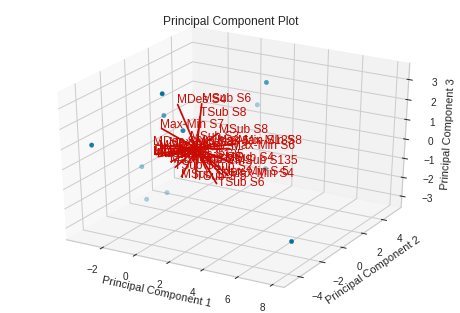

In [26]:
target = ['TSub S135']
features = ['TSub S8','TSub S135','TSub S-5','TSub S6','TSub S7','TSub S4','TSub S2','TSub S3',
            
            'MSub S8','MSub S135','MSub S-5','MSub S6','MSub S7','MSub S4','MSub S2','MSub S3',
            'MDes S8','MDes S135','MDes S-5','MDes S6','MDes S7','MDes S4', 'MDes S2', 'MDes S3',
            'Max-Min S8', 'Max-Min S135', 'Max-Min S-5','Max-Min S6','Max-Min S7','Max-Min S4','Max-Min S2', 'Max-Min S3']


X = df[features]
y= df[target]



from yellowbrick.features.pca import PCADecomposition

visualizer = PCADecomposition(scale=True, proj_features=True, proj_dim=3)
visualizer.fit_transform(X,y)
visualizer.poof()

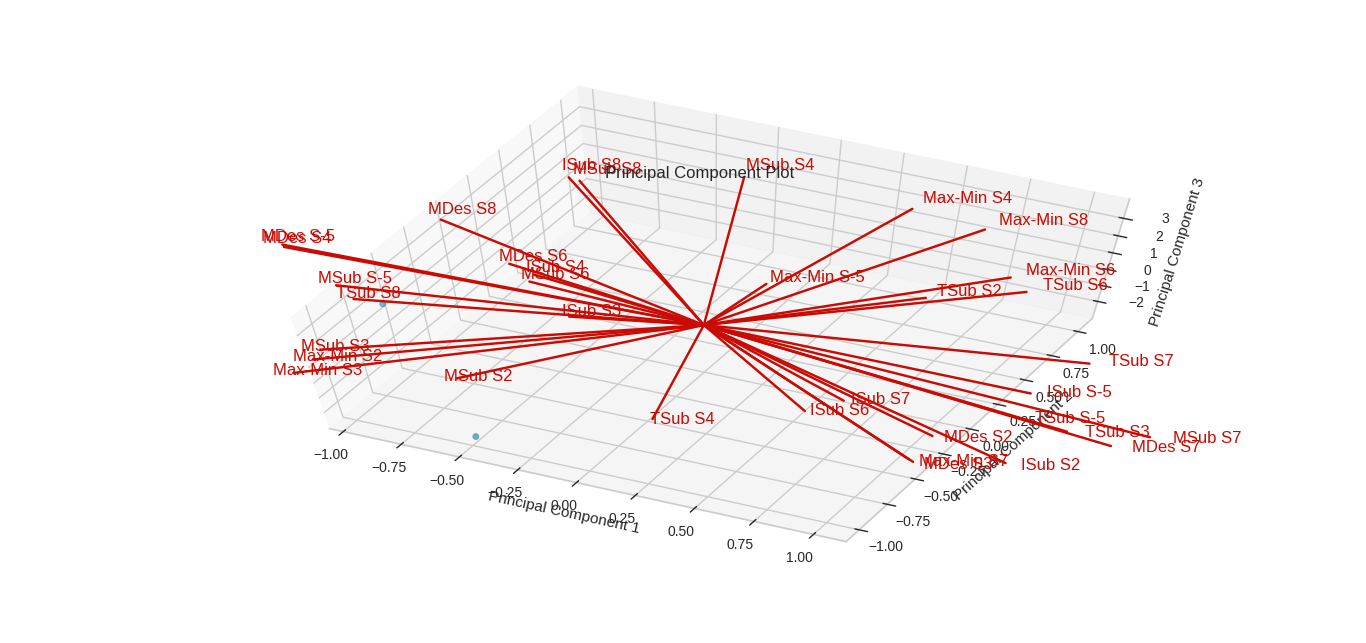

In [28]:
from IPython.display import Image
Image(filename='biplot3D.png',width=600,height=600)

#### In the previous graph it can be determined that the rise integral,the maximum fall value and the maximum rise value of the sensor response;these characteristics that provide discriminant information. On the other hand, the characteristics that least contribute discriminant information is the value maximum rise of sensor S4 and rise time of sensor S4.

#### In order to explore whether the features that provide more discriminant information allow to detect a grouping in the data of the different coffee samples, I know first apply the method to the characteristic matrix of the maximum fall value of the sensor response. The following graph clearly shows a grouping of data for excellent coffee samples and to a lesser extent the grouping of coffee samples with phenol and coffee samples.


### * **Principal component analysis**

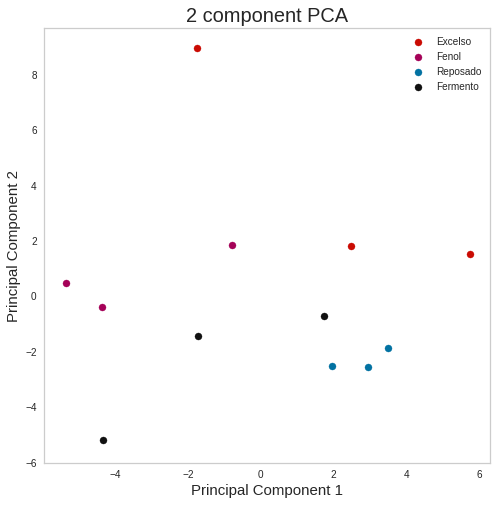

In [29]:
df = pd.DataFrame(dictionary1)

features = ['TSub S8','TSub S135','TSub S-5','TSub S6','TSub S7','TSub S4','TSub S2','TSub S3',
            'ISub S8','ISub S135','ISub S-5','ISub S6', 'ISub S7','ISub S4','ISub S2','ISub S3',
            'MSub S8','MSub S135','MSub S-5','MSub S6','MSub S7','MSub S4','MSub S2','MSub S3',
            'MDes S8','MDes S135','MDes S-5','MDes S6','MDes S7','MDes S4', 'MDes S2', 'MDes S3',
            'Est S8','Est S135','Est S-5','Est S6','Est S7','Est S4','Est S2','Est S3',
            'Max-Min S8','Max-Min S135','Max-Min S-5','Max-Min S6','Max-Min S7','Max-Min S4','Max-Min S2','Max-Min S3']

x = df.loc[:,features].values

y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)

principalComponents =pca.fit_transform(x)

principalDf = pd.DataFrame(data =principalComponents,
                           columns=['principal component 1','principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis =1)



fig = plt.figure(figsize =(8,8))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize =20 )

targets = ['Excelso','Fenol','Reposado','Fermento']
colors = ['r','m','b','k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
    finalDf.loc[indicesToKeep,'principal component 2'],
    c=color,
    s=50)    
ax.legend(targets)
ax.grid()
plt.show()

### With the results obtained it can be determined that the system is viable for the detection of patterns associated with defects in coffee samples, although it raises concerns regarding parameters of repetitiveness in the data.

### **CONCLUSIONS**

#### * It was determined that the system based on electrochemical MQ sensors together with a principal component analysis is viable to identify patterns associated with defects in coffee. This exploratory analysis allows the reduction of the volume of data that can subsequently enter an algorithm of classification or pattern recognition.